# Tidyverse - Parte 2
## Base de dados:
- Auto MPG Data Set
- archive.ics.uci.edu/ml/datasets/auto+mpg
- This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

In [1]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --

v ggplot2 3.3.3     v purrr   0.3.2
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'tibble' was built under R version 3.6.3"
Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Warning message:
"package 'forcats' was built under R version 3.6.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
setwd("Dados")

In [3]:
mpg_data <- read.table("auto_mpg.csv",
                      header = TRUE, sep = ",")

In [4]:
head(mpg_data)
str(mpg_data)

mpg,cyl,displ,hp,weight,accel,year,origin,car_name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


'data.frame':	406 obs. of  9 variables:
 $ mpg     : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cyl     : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displ   : num  307 350 318 304 302 429 454 440 455 390 ...
 $ hp      : int  130 165 150 150 140 198 220 215 225 190 ...
 $ weight  : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ accel   : num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year    : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ car_name: Factor w/ 312 levels "\tamc ambassador brougham",..: 51 38 236 15 165 144 56 228 247 2 ...


In [5]:
# Alternativamente, temos a função glimpse()
# O mesmo que a str(), porém um pouco mais bem estruturada

glimpse(mpg_data)

Rows: 406
Columns: 9
$ mpg      <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, NA, NA, NA, NA, NA, 1~
$ cyl      <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4~
$ displ    <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 133, 350, 3~
$ hp       <int> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 115, 165, 1~
$ weight   <int> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 3850, 3~
$ accel    <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, 17.5~
$ year     <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7~
$ origin   <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3~
$ car_name <fct> 	chevrolet chevelle malibu, 	buick skylark 320, 	plymouth satellite, 	amc rebel sst, 	ford torino, 	ford galaxie 500, 	chevrolet impala, 	plymouth fury iii, 	pontiac catalina, 	amc ambassador dpl, 	citroen ds-21 pallas, 	chevrolet chevelle concours (sw), 	ford torino (sw), 	plymouth satellite (sw), 	amc rebel sst (sw), 	

In [6]:
# Função gather() para agrupar colunas em atributos

big_iris <- iris %>% gather(key = "attribute", value = "measurement",
                           Sepal.Length, Sepal.Width, Petal.Length, Petal.Width)

In [7]:
head(iris)
head(big_iris)
dim(iris)
dim(big_iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


Species,attribute,measurement
setosa,Sepal.Length,5.1
setosa,Sepal.Length,4.9
setosa,Sepal.Length,4.7
setosa,Sepal.Length,4.6
setosa,Sepal.Length,5.0
setosa,Sepal.Length,5.4


[1] 150   5

[1] 600   3

In [8]:
# Função unite() - unir colunas em um mesmo atributo

mpg_data3 <- unite_(mpg_data, "Fuel_Efficiency", c("mpg","cyl"))
head(mpg_data3, 10)

Fuel_Efficiency,displ,hp,weight,accel,year,origin,car_name
18_8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15_8,350,165,3693,11.5,70,1,buick skylark 320
18_8,318,150,3436,11.0,70,1,plymouth satellite
16_8,304,150,3433,12.0,70,1,amc rebel sst
17_8,302,140,3449,10.5,70,1,ford torino
15_8,429,198,4341,10.0,70,1,ford galaxie 500
14_8,454,220,4354,9.0,70,1,chevrolet impala
14_8,440,215,4312,8.5,70,1,plymouth fury iii
14_8,455,225,4425,10.0,70,1,pontiac catalina
15_8,390,190,3850,8.5,70,1,amc ambassador dpl


In [9]:
# Função separate() - faz o inverso da unite()

mpg_data4 <- mpg_data3 %>% separate(Fuel_Efficiency, c("mpg","cyl"));
head(mpg_data4, 10)

Warning message:
"Expected 2 pieces. Additional pieces discarded in 139 rows [195, 197, 198, 202, 204, 209, 210, 211, 214, 219, 220, 224, 227, 228, 229, 231, 233, 234, 236, 238, ...]."


mpg,cyl,displ,hp,weight,accel,year,origin,car_name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500
14,8,454,220,4354,9.0,70,1,chevrolet impala
14,8,440,215,4312,8.5,70,1,plymouth fury iii
14,8,455,225,4425,10.0,70,1,pontiac catalina
15,8,390,190,3850,8.5,70,1,amc ambassador dpl


In [17]:
# Funções group_by() e summarize()

mpg_group <-  mpg_data %>% group_by(year) %>% summarize(avg_displ = mean(displ))

head(mpg_group, 10)

year,avg_displ
70,286.8571
71,205.8621
72,218.3750
73,256.8750
74,171.7407
75,205.5333
76,197.7941
77,191.3929
78,177.8056
79,206.6897


In [18]:
mpg_group2 <- mpg_data %>% group_by(year) %>% summarize(avg_displ = mean(hp, na.rm = TRUE))

head(mpg_group2, 10)

year,avg_displ
70,148.85714
71,104.92857
72,120.17857
73,130.47500
74,94.23077
75,101.06667
76,101.11765
77,105.07143
78,99.69444
79,101.20690


In [19]:
#Agrupando por ano e origem e calculando a média

mpg_group3 <- mpg_data %>% group_by(year, origin) %>% summarize(avg_displ = mean(displ))

head(mpg_group3, 10)

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.



year,origin,avg_displ
70,1,339.1852
70,2,112.0000
70,3,105.0000
71,1,257.0000
71,2,95.4000
71,3,88.2500
72,1,281.2500
72,2,111.0000
72,3,99.4000
73,1,314.1034


In [20]:
# Fazendo o summarize de mais de um atributo

mpg_group4 <- mpg_data %>% group_by(year, origin) %>% summarize_at(vars(cyl, displ), list(mean, sd))

head(mpg_group4, 10)

year,origin,cyl_fn1,displ_fn1,cyl_fn2,displ_fn2
70,1,7.703704,339.1852,0.7240280,77.56389
70,2,4.000000,112.0000,0.0000000,12.96148
70,3,4.000000,105.0000,0.0000000,11.31371
71,1,6.200000,257.0000,1.5761379,102.42841
71,2,4.000000,95.4000,0.0000000,13.72224
71,3,4.000000,88.2500,0.0000000,20.41854
72,1,6.888889,281.2500,1.8435544,111.65207
72,2,4.000000,111.0000,0.0000000,13.24764
72,3,3.800000,99.4000,0.4472136,19.26915
73,1,7.241379,314.1034,1.2437034,89.91597


In [21]:
# Função arrange()
# Escolhendo diferentes estatisticas de mais de um atributo e ordenando por multiplas variáveis

mpg_group5 <- mpg_data %>% group_by(year, origin) %>%
                summarize(mean_cyl = mean(cyl), sd_displ = sd(displ)) %>% 
                arrange(year, origin, mean_cyl)

head(mpg_group5, 10)

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.



year,origin,mean_cyl,sd_displ
70,1,7.703704,77.56389
70,2,4.000000,12.96148
70,3,4.000000,11.31371
71,1,6.200000,102.42841
71,2,4.000000,13.72224
71,3,4.000000,20.41854
72,1,6.888889,111.65207
72,2,4.000000,13.24764
72,3,3.800000,19.26915
73,1,7.241379,89.91597


In [27]:
# summarize_at te permite excluir os atributos não numéricos e aplicar as funções a todo o resto
# Caso seu dataframe contenha apenas dados numéricos, basta usar sumarize_all()

mpg_group6 <- mpg_data %>% group_by(year) %>%
                summarize_at(vars(mpg, hp, accel), funs(avg = mean(., na.rm = TRUE), desvio = sd(., na.rm = TRUE))) %>%
                arrange(year, hp_avg)

head(mpg_group6, 10)

year,mpg_avg,hp_avg,accel_avg,mpg_desvio,hp_desvio,accel_desvio
70,17.68966,148.85714,12.71429,5.339231,49.63048,3.297249
71,21.25000,104.92857,15.31034,6.591942,39.45549,2.769134
72,18.71429,120.17857,15.12500,5.435529,41.12137,2.850032
73,17.10000,130.47500,14.31250,4.700245,46.41230,2.754222
74,22.70370,94.23077,16.20370,6.420010,29.68678,1.688532
75,20.26667,101.06667,16.05000,4.940566,26.57706,2.471737
76,21.57353,101.11765,15.94118,5.889297,32.43059,2.801419
77,23.37500,105.07143,15.43571,6.675862,36.09548,2.273391
78,24.06111,99.69444,15.80556,6.898044,28.43621,2.129915
79,25.09310,101.20690,15.81379,6.794217,28.45596,2.952931


In [28]:
# Lembrando que o group_by pode ser atribuido em uma variável

mpg_group7 <- group_by(mpg_data, year)

head(mpg_group7,10)

mpg,cyl,displ,hp,weight,accel,year,origin,car_name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500
14,8,454,220,4354,9.0,70,1,chevrolet impala
14,8,440,215,4312,8.5,70,1,plymouth fury iii
14,8,455,225,4425,10.0,70,1,pontiac catalina
15,8,390,190,3850,8.5,70,1,amc ambassador dpl


In [29]:
class(mpg_group7)

[1] "grouped_df" "tbl_df"     "tbl"        "data.frame"

In [30]:
# Esse objeto agrupado pode ser usado para calcular rapidamente as estatisticas
# resumidas por grupo, que, no nosso caso, é o ano

# Calculando o número de registros por ano

tally(mpg_group7)

year,n
70,35
71,29
72,28
73,40
74,27
75,30
76,34
77,28
78,36
79,29


In [31]:
# Ou, alternativamente:

mpg_group8 <- mpg_data %>% group_by(year) %>% tally

mpg_group8

year,n
70,35
71,29
72,28
73,40
74,27
75,30
76,34
77,28
78,36
79,29


In [32]:
# Ou a média - no caso da linha abaixo, fazer esta atribuição do group_by a uma ariável
# seria como um atalho para os códigos que rodamos acima

summarize(mpg_group7, average = mean(hp, na.rm = TRUE))

year,average
70,148.85714
71,104.92857
72,120.17857
73,130.47500
74,94.23077
75,101.06667
76,101.11765
77,105.07143
78,99.69444
79,101.20690


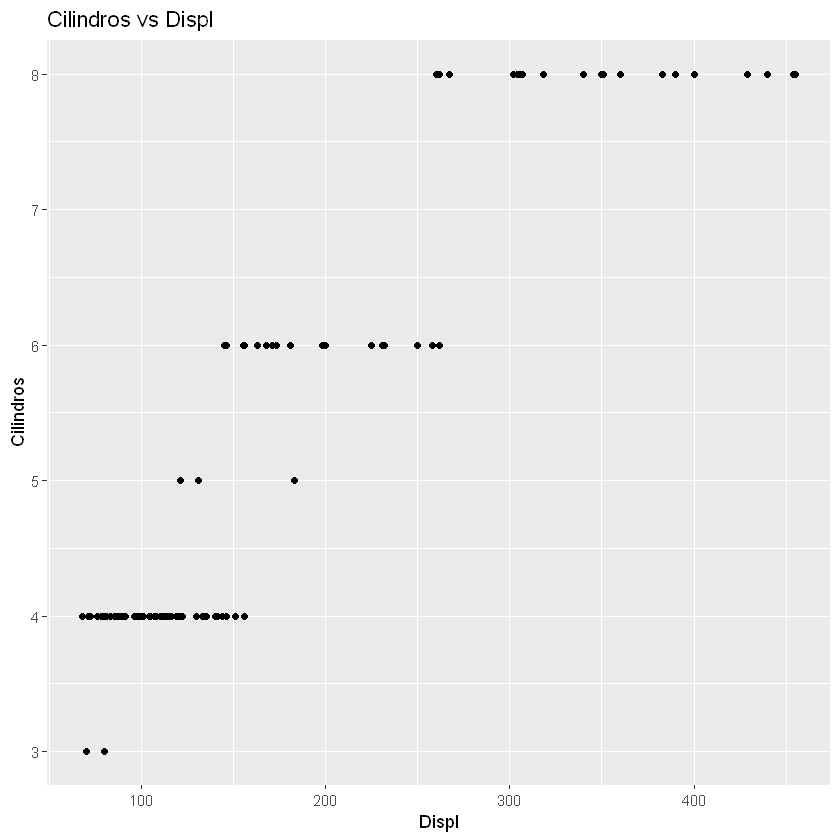

In [33]:
 # Visualização dos dados com qplot (quick plot)

qplot(mpg_group7$displ
     , mpg_group7$cyl
     , xlab = "Displ"
     , ylab = "Cilindros"
     , main = "Cilindros vs Displ")

Warning message:
"Removed 6 rows containing non-finite values (stat_boxplot)."


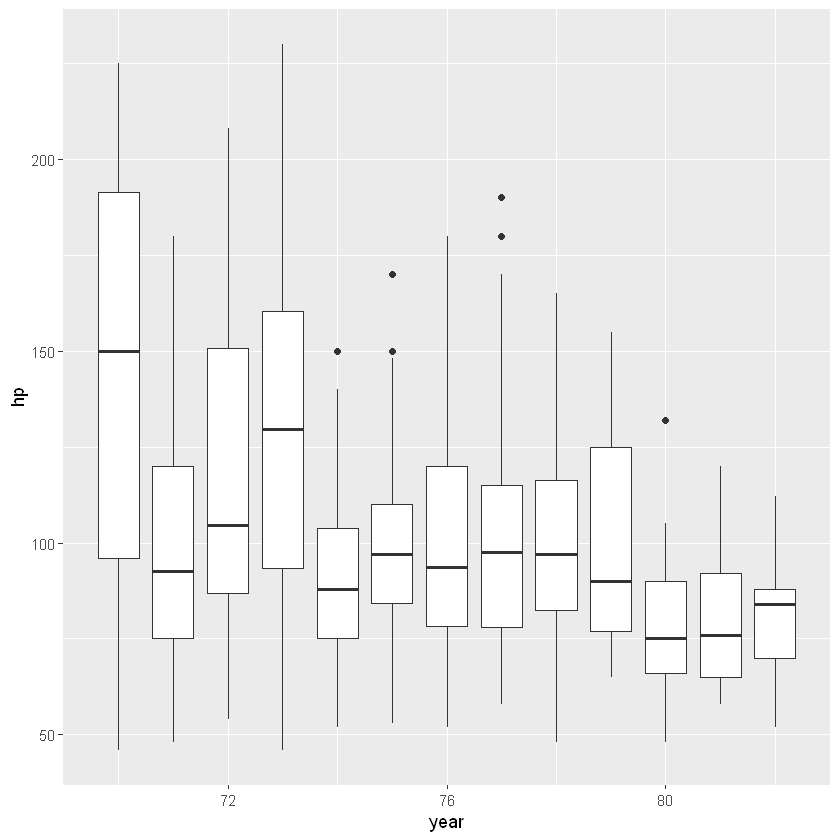

In [36]:
# Ou com ggplot - método tradicional

ggplot(mpg_group7, aes(x = year, y = hp, group = year)) +
    geom_boxplot()

In [38]:
# Fazendo todo o plot com o pipe %>%

chart1 <- mpg_data %>%
            group_by(year) %>%
            filter(grepl("chevrolet", car_name)) %>%
            ggplot(aes(x = cyl, y = mpg, group = cyl)) + geom_boxplot() + ggtitle("Chevrolet")

chart2 <- mpg_data %>%
            group_by(year) %>%
            filter(grepl("ford", car_name)) %>%
            ggplot(aes(x = cyl, y = mpg, group = cyl)) + geom_boxplot() + ggtitle("Ford")

In [ ]:
library(ggpubr)

Warning message:
"package 'ggpubr' was built under R version 3.6.3"
Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."
Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."


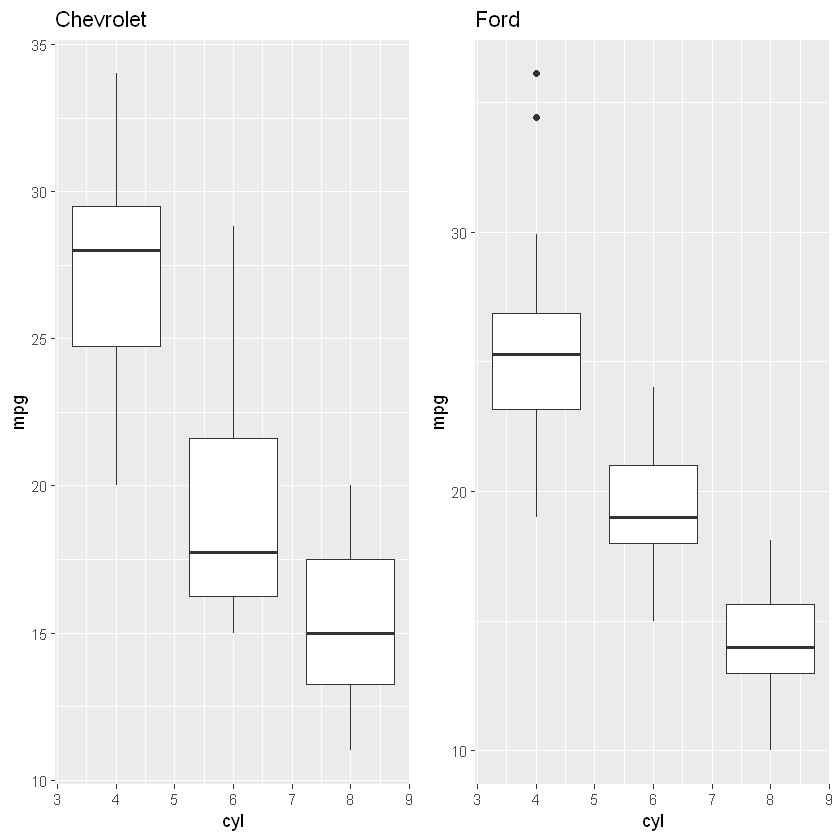

In [39]:
# E organizando multiplos plots com ggarrange()

ggarrange(chart1, chart2
         , ncol = 2, nrow = 1)

Warning message:
"Removed 6 rows containing missing values (geom_point)."


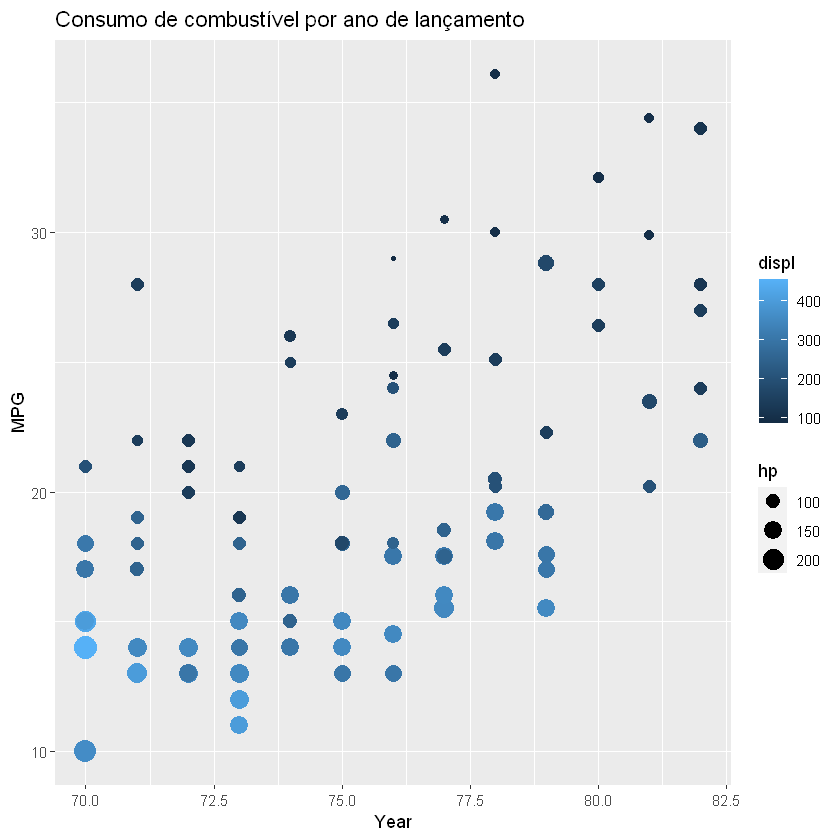

In [42]:
mpg_data %>%
    filter(grepl("chevrolet|ford", car_name)) %>% 
    ggplot(aes(year, mpg, size = hp, colour = displ)) + geom_point() +
    labs(title = "Consumo de combustível por ano de lançamento", x= "Year", y = "MPG")

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 3 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 6 rows containing missing values (geom_point)."


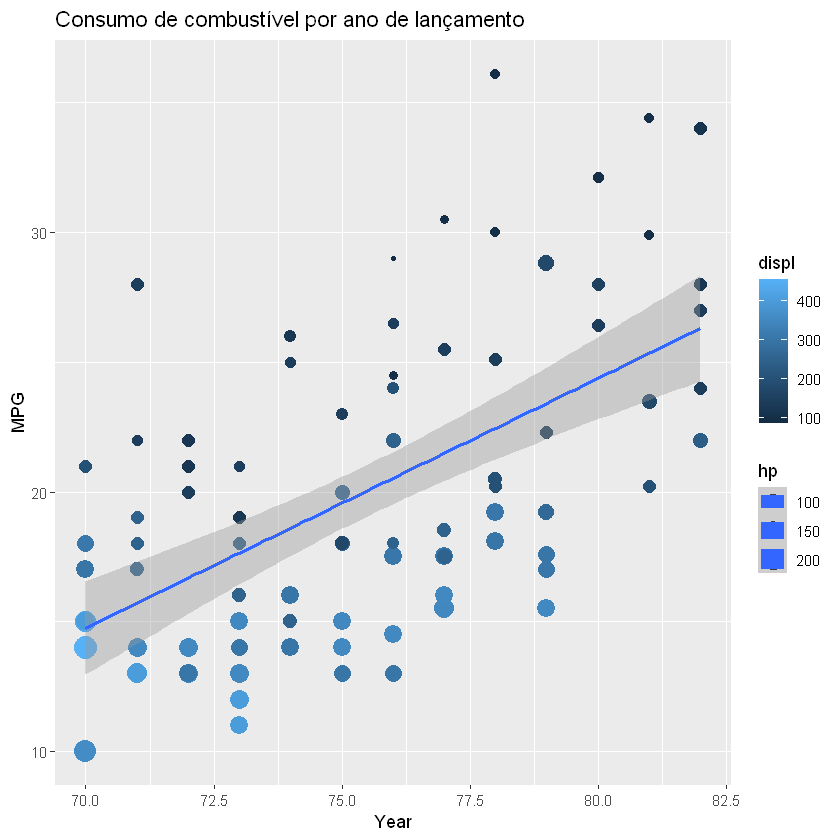

In [44]:
# Se quiser adicionar uma linha de regresão use geom_smooth()

mpg_data %>%
    filter(grepl("chevrolet|ford", car_name)) %>% 
    ggplot(aes(year, mpg, size = hp, colour = displ)) + geom_point() +
    labs(title = "Consumo de combustível por ano de lançamento", x= "Year", y = "MPG") +
    geom_smooth(method = lm)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
"Removed 1 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 1 rows containing missing values (geom_point)."


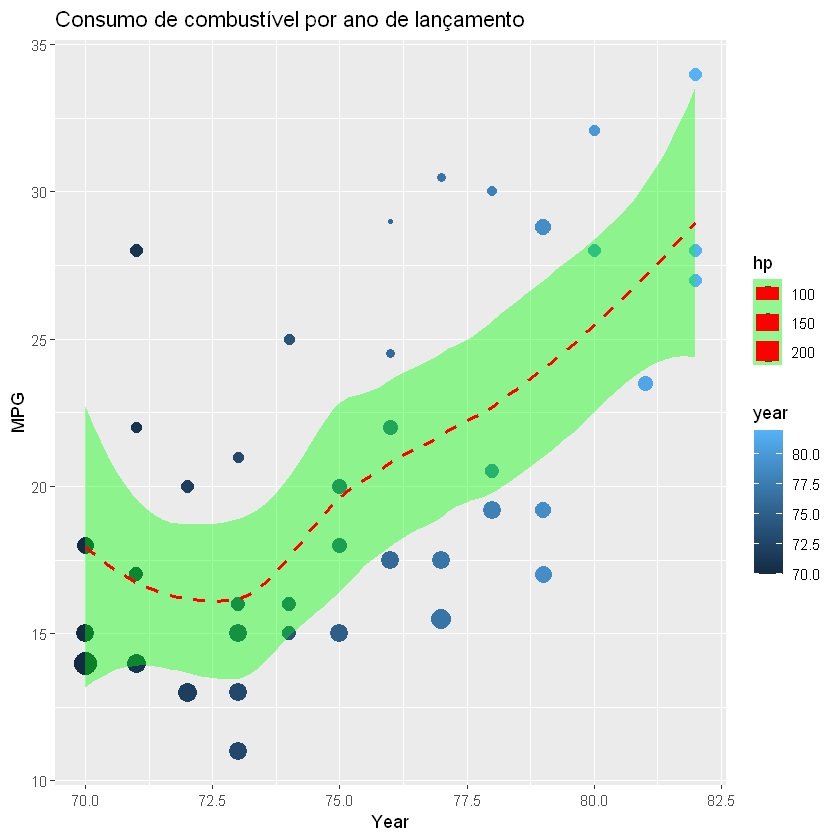

In [45]:
# Se quiser adicionar uma linha de regresão use geom_smooth()

mpg_data %>%
    filter(grepl("chevrolet", car_name)) %>% 
    ggplot(aes(year, mpg, size = hp, colour = year)) + geom_point() +
    labs(title = "Consumo de combustível por ano de lançamento", x= "Year", y = "MPG") +
    geom_smooth(linetype = "dashed",
                color = "red", fill = "green")